Install the Python SDK

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 1.3 MB/s eta 0:00:00


### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In [2]:
import getpass
import os
import pathlib
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

Provide your Google API Key··········


## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [5]:
import google.generativeai as genai
from IPython.display import Markdown

model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("what are the top 5 frequently used emojis?")

Markdown(response.text)

The top 5 frequently used emojis:

1. 😂 Face with Tears of Joy: Expressing laughter, joy, or amusement.
2. ❤️ Red Heart: Symbolizing love, affection, or appreciation.
3. 👍 Thumbs Up: Indicating approval, agreement, or support.
4. 🙂 Smiling Face: Conveying a friendly, happy, or positive emotion.
5. 😭 Loudly Crying Face: Expressing intense sadness, sorrow, or disappointment.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to saftey concerns regarding the prompt.

In [6]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with `GenerateContentResponse.candidates`:

In [7]:
response.candidates

[content {
  parts {
    text: "The top 5 frequently used emojis:\n\n1. \360\237\230\202 Face with Tears of Joy: Expressing laughter, joy, or amusement.\n2. \342\235\244\357\270\217 Red Heart: Symbolizing love, affection, or appreciation.\n3. \360\237\221\215 Thumbs Up: Indicating approval, agreement, or support.\n4. \360\237\231\202 Smiling Face: Conveying a friendly, happy, or positive emotion.\n5. \360\237\230\255 Loudly Crying Face: Expressing intense sadness, sorrow, or disappointment."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [19]:
# %%time
# model.generate_content("What is the meaning of life?", stream=True)

## Generate response from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

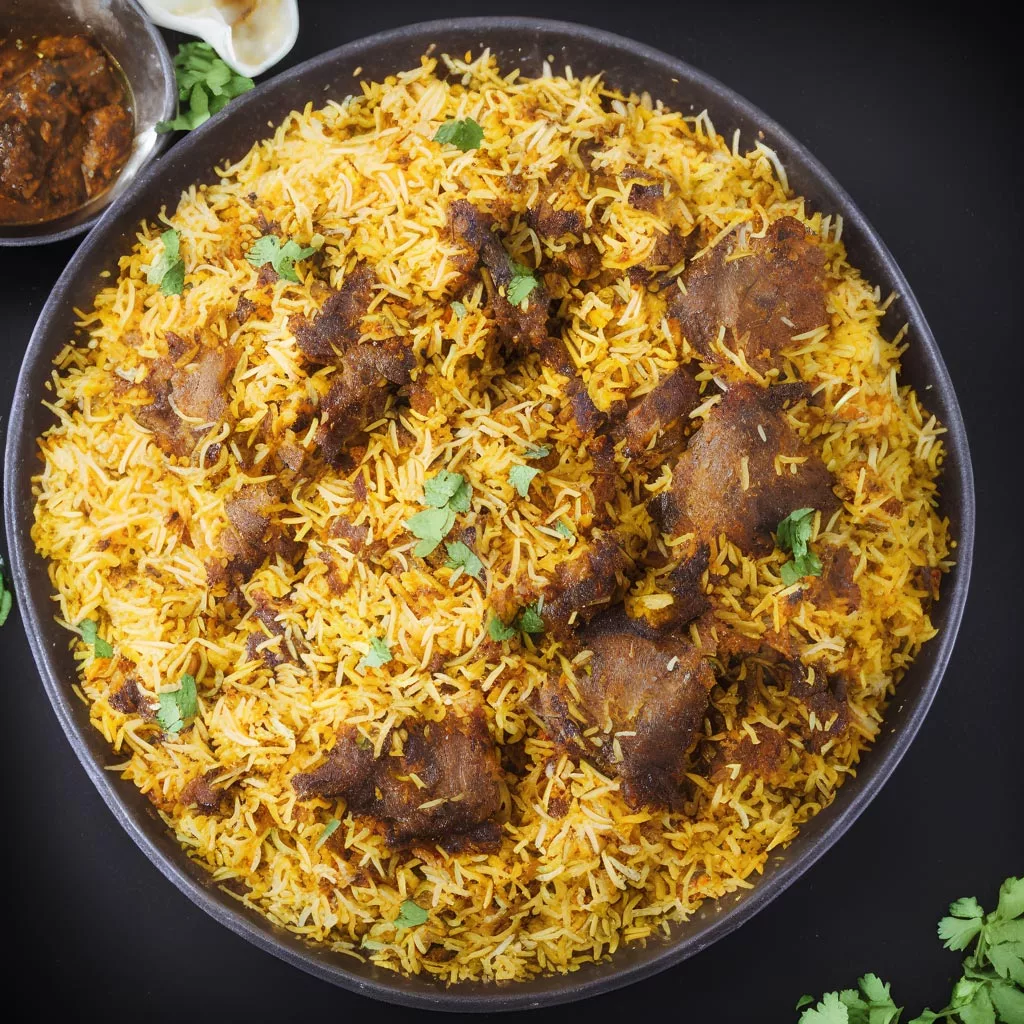

In [18]:
import PIL.Image

img = PIL.Image.open('Biryani.png')
img

In [19]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)

to_markdown(response.text)

>  This is Mutton Biryani. It is a dish made with rice, meat, and spices. It is a popular dish in many parts of the world, including India, Pakistan, and Bangladesh.

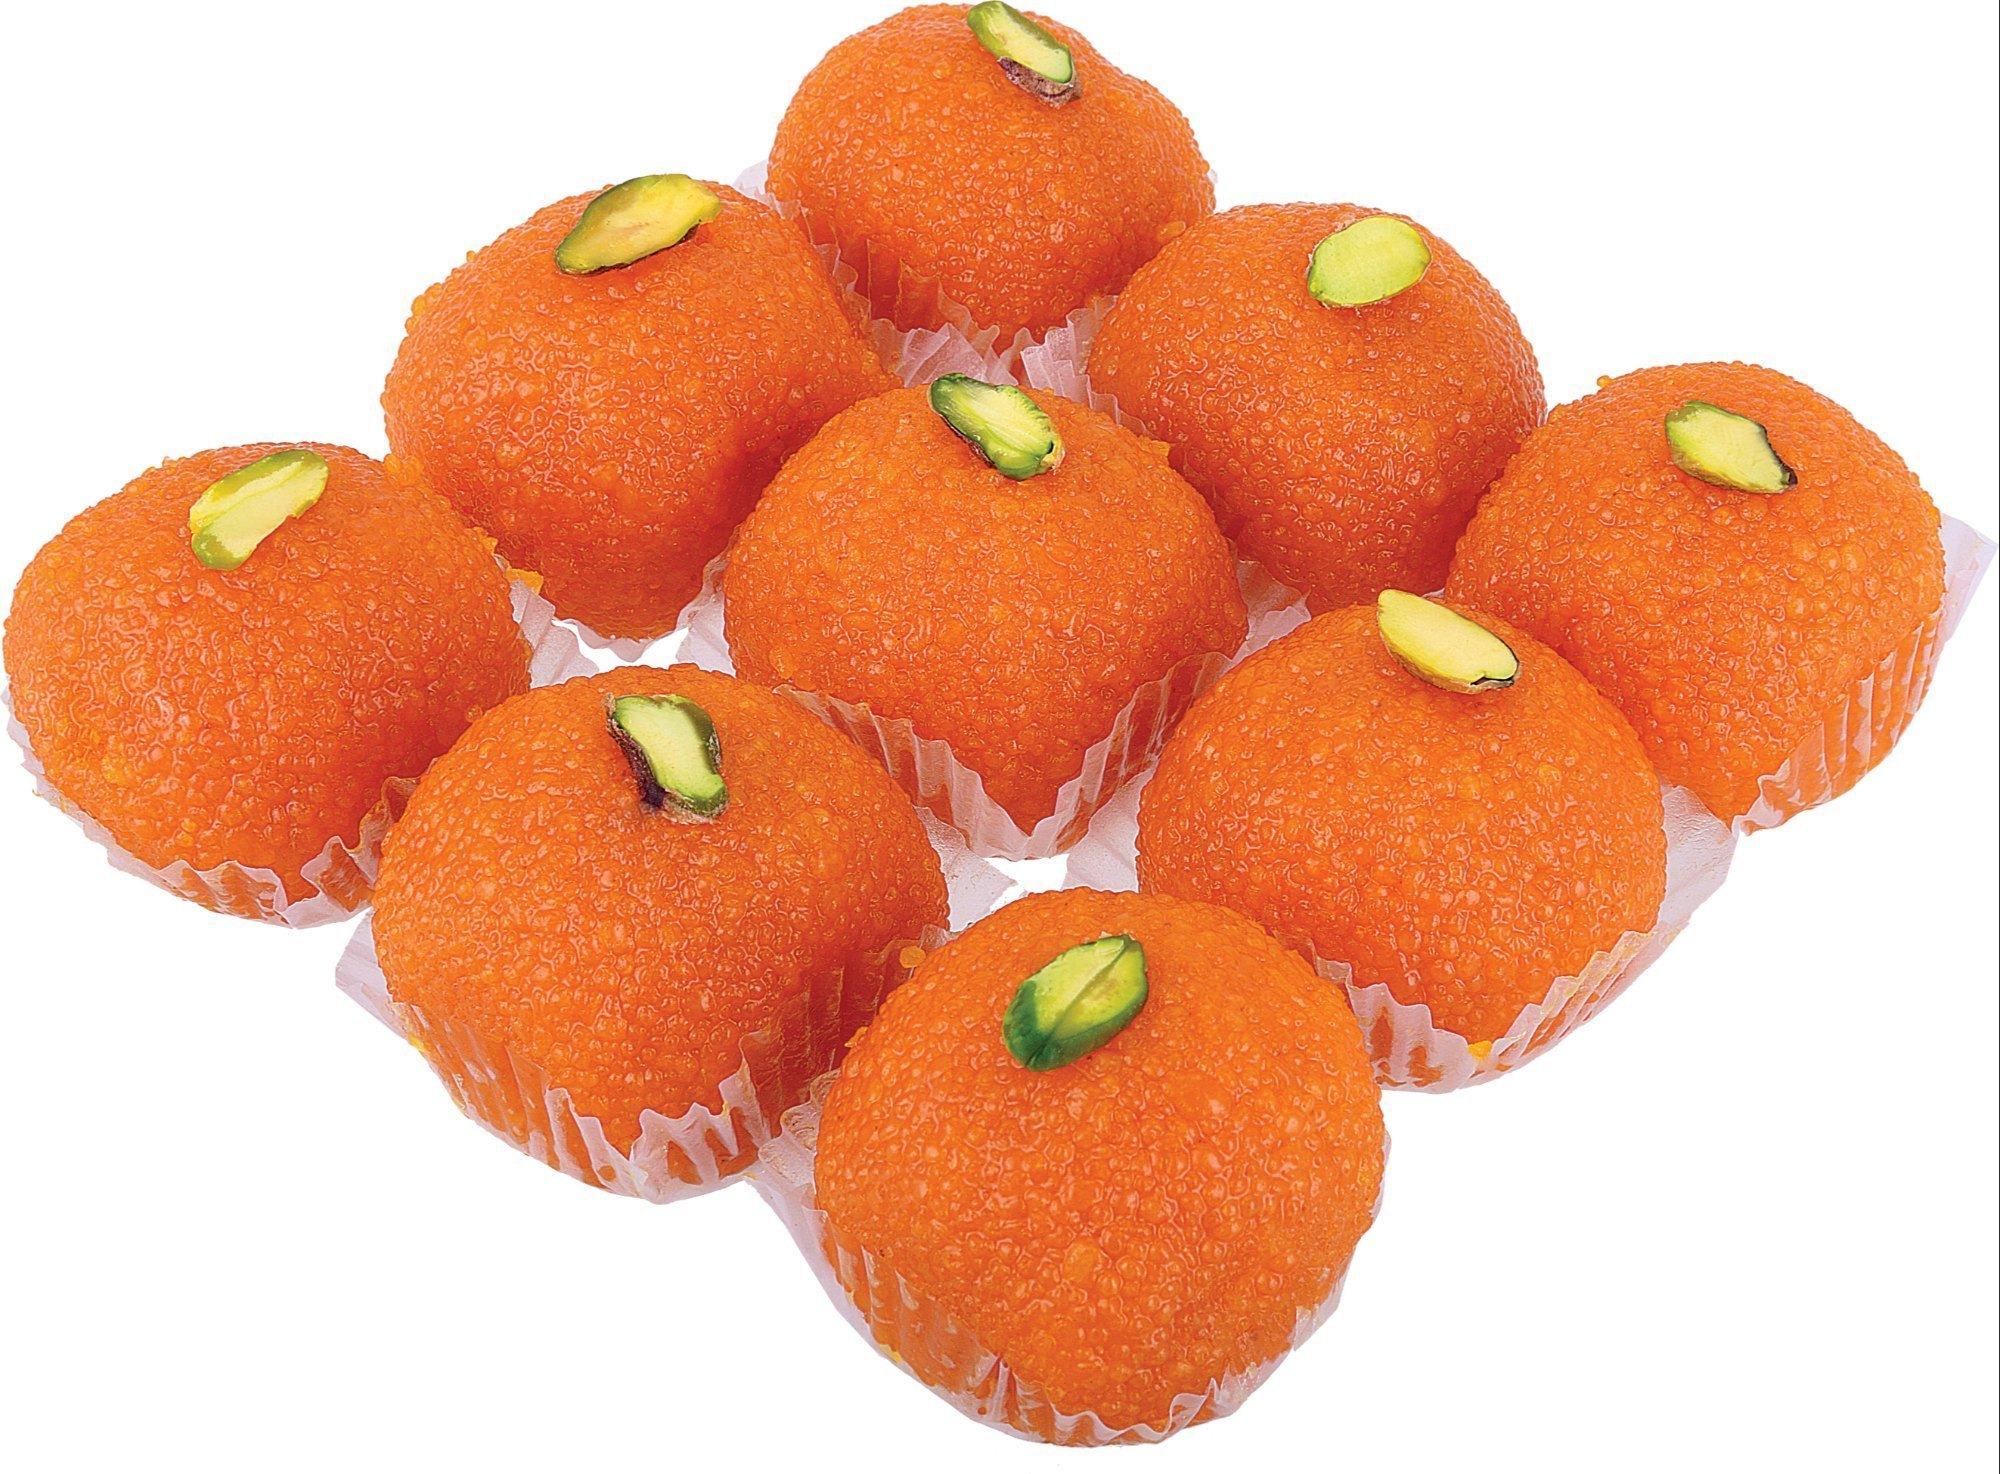

In [20]:
img1 = PIL.Image.open('sweet.jpg')
img1

In [21]:
response = model.generate_content(["what is the difference between two images and explain in detail", img,img1], stream=True)
response.resolve()
to_markdown(response.text)

>  The first image is of a biryani, which is a South Asian dish made with rice, meat, and vegetables. The second image is of a ladoo, which is a South Asian sweet made with flour, sugar, and ghee.
> 
> The main difference between the two images is the ingredients used. Biryani is made with rice, meat, and vegetables, while ladoo is made with flour, sugar, and ghee. The second difference is the cooking process. Biryani is cooked in a pot, while ladoo is made by frying the ingredients in oil. The third difference is the taste. Biryani is a savory dish, while ladoo is a sweet dish.